# Predvidevanje obrabljenosti orodja s pomočjo                         globokega učenja

Dataset v notebooku last: University of Michigan SMART Lab 
https://www.kaggle.com/shasun/tool-wear-detection-in-cnc-mill/version/1#README.txt

## Predstavitev data seta:

### Opombe priložene k datasetu:

Vsaka vrstica v data setu je posneta v intervalu 100 ms.

x_/y_/z_ v predponi:

-   ActualPosition: actual x/y/z position of part (mm)
-	ActualVelocity: actual x/y/z velocity of part (mm/s)
-	ActualAcceleration: actual x/y/z acceleration of part (mm/s/s)
-	CommandPosition: reference  x/y/z position of part (mm)
-	CommandVelocity: reference  x/y/z velocity of part (mm/s)
-	CommandAcceleration: reference  x/y/z acceleration of part (mm/s/s)
-	CurrentFeedback: current (A)
-	DCBusVoltage: voltage (V)
-	OutputCurrent: current (A)
-	OutputVoltage: voltage (V)
-	OutputPower: power (v kW)

s_ v predponi:

-	ActualPosition: actual position of spindle (mm)
-	ActualVelocity: actual velocity of spindle (mm/s)
-	ActualAcceleration: actual acceleration of spindle (mm/s/s)
-	CommandPosition: reference position of spindle (mm)
-	CommandVelocity: reference velocity of spindle (mm/s)
-	CommandAcceleration: reference acceleration of spindle (mm/s/s)
-	CurrentFeedback: current (A)
-	DCBusVoltage: voltage (V)
-	OutputCurrent: current (A)
-	OutputVoltage: voltage (V)
-	OutputPower: current (A)
-	SystemInertia: torque inertia (kg*m^2)

M1_ v predponi:

-  M1_CURRENT_PROGRAM_NUMBER: number the program is listed under on the CNC
-  M1_sequence_number: line of G-code being executed
-  M1_CURRENT_FEEDRATE: spindle speed (mm/s)
        
Note: Some variables will not accurately reflect the operation of the
    CNC machine. This can usually be detected by when:
    -M1_CURRENT_FEEDRATE reads 50,
    -when X1 ActualPosition reads 198,
    -when M1_CURRENT_PROGRAM_NUMBER does not read 0.
    
The source of these errors has not been identified. 




In [47]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

In [48]:
path = 'C:/Users/python_zan/Downloads/data01/zdruzeno123.csv'

df = pd.read_csv(path)

df = df.drop(df.columns[0], axis=1)

df['Tool_Condition'] = df.Tool_Condition.map({'unworn':1, 'worn':0})

df['Zaporedna_meritev'] = np.arange(len(df))

# 11. experiment se podvoji saj 12. ni bil popolen

# Odstranimo napake v datasetu

In [49]:
df = df[df.x_ActualPosition !=198]

df = df[df.M1_CURRENT_FEEDRATE !=50]


### Pie chart prikazuje [%] eksperimentov z obrabljenimi oz. neobrabljenimi orodji

46.822330477630324

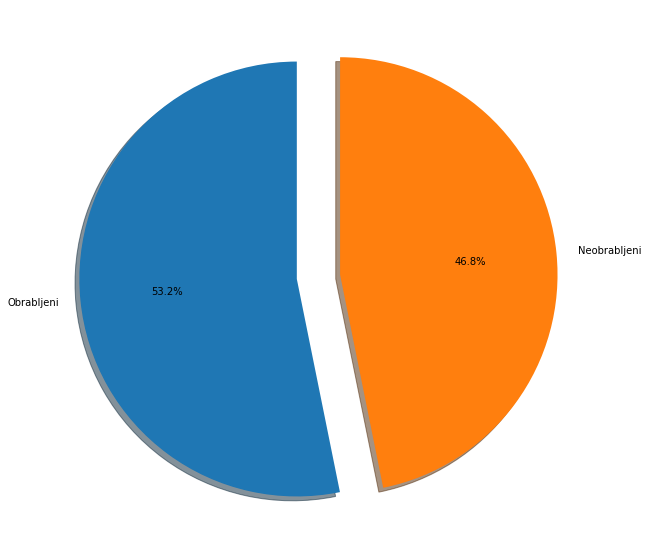

In [50]:
df_dobrih = pd.DataFrame(df)
dobri = df_dobrih.apply(lambda x: True if x['Tool_Condition']>0 else False, axis=1)
st_dobrih = len(dobri[dobri == True].index)

df_slabih = pd.DataFrame(df)
slabi = df_slabih.apply(lambda x: True if x['Tool_Condition']<1 else False, axis=1)
st_slabih = len(slabi[slabi == True].index)

skupaj=st_slabih+st_dobrih

st_obrabljenih = (st_slabih/skupaj)*100

st_neobrabljenih = (st_dobrih/skupaj)*100

plt.figure(figsize=(10,10))
plt.pie([st_obrabljenih, st_neobrabljenih],explode =[0,0.2],labels=['Obrabljeni','Neobrabljeni'],
        autopct='%1.1f%%', shadow=True, startangle=90)

st_neobrabljenih


#### Grafično preverjeno, če smo odpravili napake

([<matplotlib.axis.XTick at 0x8a74d57cf8>,
 <a list of 3 Text xticklabel objects>)

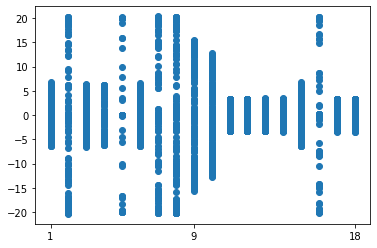

In [51]:
plt.plot('#', 'x_ActualVelocity', 'o', data=df)
plt.xticks([1,9,18])

# Korelacija

In [52]:
df.corr()

,#,Tool_Condition,Feedrate,Clamp_Pressure,x_ActualPosition,x_ActualVelocity,x_ActualAcceleration,x_CommandPosition,x_CommandVelocity,x_CommandAcceleration,...,s_CurrentFeedback,s_DCBusVoltage,s_OutputCurrent,s_OutputVoltage,s_OutputPower,SystemInertia,M1_CURRENT_PROGRAM_NUMBER,M1_sequence_number,M1_CURRENT_FEEDRATE,Zaporedna_meritev
#,1.000000,-0.307431,-0.447674,-0.567241,0.006452,0.019781,-0.010110,0.006134,0.019406,-0.000285,...,-0.067335,-0.095286,0.299464,-0.030942,-0.107913,NaN,NaN,0.020331,-0.447050,0.980172
Tool_Condition,-0.307431,1.000000,-0.161658,0.100438,-0.003363,0.005200,-0.010813,-0.003020,0.006006,0.005269,...,0.004859,0.001710,0.037126,0.014374,0.012396,NaN,NaN,-0.004424,-0.162380,-0.322939
Feedrate,-0.447674,-0.161658,1.000000,0.261429,-0.004499,-0.041772,0.040026,-0.004675,-0.038249,0.024827,...,0.094907,0.133568,-0.276687,0.002144,0.133192,NaN,NaN,-0.049587,0.999152,-0.458468
Clamp_Pressure,-0.567241,0.100438,0.261429,1.000000,0.005534,-0.012922,-0.007449,0.005660,-0.012801,-0.001973,...,0.059390,0.095879,-0.198865,0.078479,0.121216,NaN,NaN,0.015197,0.261202,-0.676026
x_ActualPosition,0.006452,-0.003363,-0.004499,0.005534,1.000000,0.037692,-0.028336,0.998960,0.033441,-0.039312,...,-0.015051,-0.019593,-0.008301,-0.017064,-0.019274,NaN,NaN,0.054311,-0.006991,0.002854
x_ActualVelocity,0.019781,0.005200,-0.041772,-0.012922,0.037692,1.000000,0.042786,0.043572,0.992934,-0.052050,...,-0.040210,-0.062464,0.046946,0.036760,-0.046227,NaN,NaN,-0.018346,-0.040555,0.023376
x_ActualAcceleration,-0.010110,-0.010813,0.040026,-0.007449,-0.028336,0.042786,1.000000,-0.028422,0.077145,0.290308,...,0.006695,0.008978,-0.001285,0.035266,0.027999,NaN,NaN,0.000112,0.039873,-0.008809
x_CommandPosition,0.006134,-0.003020,-0.004675,0.005660,0.998960,0.043572,-0.028422,1.000000,0.039334,-0.039049,...,-0.016701,-0.021646,-0.006998,-0.023811,-0.021592,NaN,NaN,0.053355,-0.008074,0.002659
x_CommandVelocity,0.019406,0.006006,-0.038249,-0.012801,0.033441,0.992934,0.077145,0.039334,1.000000,0.054759,...,-0.041395,-0.063355,0.046059,0.039205,-0.045175,NaN,NaN,-0.019584,-0.037028,0.023173
x_CommandAcceleration,-0.000285,0.005269,0.024827,-0.001973,-0.039312,-0.052050,0.290308,-0.039049,0.054759,1.000000,...,-0.009849,-0.007499,-0.004315,0.020962,0.010018,NaN,NaN,-0.015335,0.024851,0.001829


## Vse kar je odstranjeno nima korelacije s podatki

In [53]:


df = df.drop(columns=['#', 'Material','Process','z_DCBusVoltage', 'z_CurrentFeedback','z_OutputCurrent','z_OutputVoltage', 'Finalizes', 'Visual Inspection','M1_CURRENT_PROGRAM_NUMBER',
                          'Zaporedna_meritev', 'SystemInertia','M1_CURRENT_FEEDRATE'], axis=1)
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 17859 entries, 31 to 25323
Data columns (total 43 columns):
Tool_Condition           17859 non-null int64
Feedrate                 17859 non-null int64
Clamp_Pressure           17859 non-null float64
x_ActualPosition         17859 non-null float64
x_ActualVelocity         17859 non-null float64
x_ActualAcceleration     17859 non-null float64
x_CommandPosition        17859 non-null float64
x_CommandVelocity        17859 non-null float64
x_CommandAcceleration    17859 non-null float64
x_CurrentFeedback        17859 non-null float64
x_DCBusVoltage           17859 non-null float64
x_OutputCurrent          17859 non-null float64
x_OutputVoltage          17859 non-null float64
x_OutputPower            17859 non-null float64
y_ActualPosition         17859 non-null float64
y_ActualVelocity         17859 non-null float64
y_ActualAcceleration     17859 non-null float64
y_CommandPosition        17859 non-null float64
y_CommandVelocity        17859

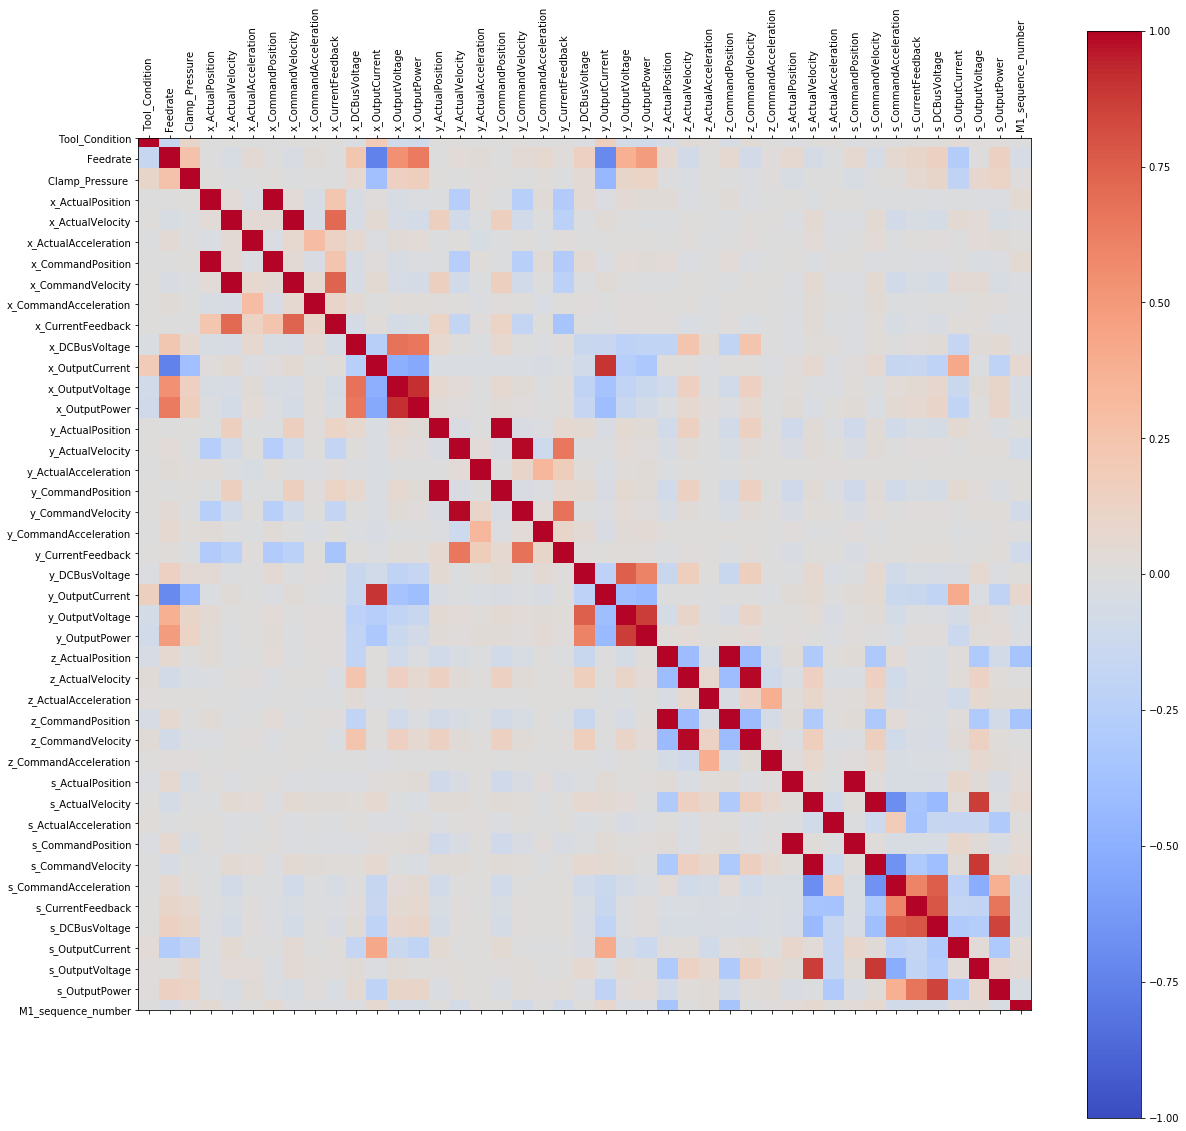

In [32]:
#corr() dokumentacija https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

corr = df.corr()
fig = plt.figure(figsize=(20,20))
x = fig.add_subplot(111)
cax = x.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
x.set_xticks(ticks)
plt.xticks(rotation=90)
x.set_yticks(ticks)
x.set_xticklabels(df.columns)
x.set_yticklabels(df.columns)
plt.show()


# Keras

In [9]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras import optimizers
import sklearn
from keras.layers import Dense
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy

Using TensorFlow backend.



## Nevronska mreža 42-90-45-15-1

In [14]:
x_train = df.drop(columns=['Tool_Condition'], axis=1)

y_train = df[['Tool_Condition']]

ponovitve = 300

model = Sequential()

# Input in prvi layer 

model.add(Dense(units = 90, kernel_initializer="uniform", activation = 'relu', input_dim = 42))

# 2,3,4,5 layer
model.add(Dense(units =45 , kernel_initializer="uniform", activation = 'relu'))
model.add(Dense(units =45 , kernel_initializer="uniform", activation = 'relu'))
model.add(Dense(units =15 , kernel_initializer="uniform", activation = 'relu'))


# output layer

model.add(Dense(units = 1, kernel_initializer="uniform", activation = 'sigmoid'))

#autostop


#optimizacija

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#fit

history = model.fit(x_train, y_train, shuffle=True, validation_split = 0.2, batch_size = 32, epochs = ponovitve, verbose=2)



Train on 14287 samples, validate on 3572 samples
Epoch 1/300
 - 3s - loss: 0.6914 - acc: 0.5245 - val_loss: 0.6898 - val_acc: 0.5507
Epoch 2/300
 - 1s - loss: 0.6880 - acc: 0.5363 - val_loss: 0.6851 - val_acc: 0.5392
Epoch 3/300
 - 1s - loss: 0.6793 - acc: 0.5618 - val_loss: 0.6878 - val_acc: 0.5999
Epoch 4/300
 - 1s - loss: 0.6666 - acc: 0.5778 - val_loss: 0.6828 - val_acc: 0.5792
Epoch 5/300
 - 1s - loss: 0.6594 - acc: 0.5877 - val_loss: 0.6793 - val_acc: 0.6022
Epoch 6/300
 - 1s - loss: 0.6520 - acc: 0.5952 - val_loss: 0.6831 - val_acc: 0.5955
Epoch 7/300
 - 1s - loss: 0.6458 - acc: 0.6011 - val_loss: 0.6736 - val_acc: 0.6246
Epoch 8/300
 - 1s - loss: 0.6392 - acc: 0.6031 - val_loss: 0.6861 - val_acc: 0.5865
Epoch 9/300
 - 1s - loss: 0.6311 - acc: 0.6156 - val_loss: 0.6889 - val_acc: 0.4947
Epoch 10/300
 - 1s - loss: 0.6251 - acc: 0.6257 - val_loss: 0.6503 - val_acc: 0.6419
Epoch 11/300
 - 1s - loss: 0.6200 - acc: 0.6336 - val_loss: 0.6295 - val_acc: 0.6576
Epoch 12/300
 - 1s - loss

Epoch 97/300
 - 1s - loss: 0.2341 - acc: 0.8929 - val_loss: 0.3933 - val_acc: 0.8541
Epoch 98/300
 - 1s - loss: 0.2439 - acc: 0.8852 - val_loss: 0.5324 - val_acc: 0.8183
Epoch 99/300
 - 1s - loss: 0.2302 - acc: 0.8932 - val_loss: 0.3979 - val_acc: 0.8368
Epoch 100/300
 - 1s - loss: 0.2376 - acc: 0.8889 - val_loss: 0.4355 - val_acc: 0.8312
Epoch 101/300
 - 1s - loss: 0.2336 - acc: 0.8889 - val_loss: 0.3650 - val_acc: 0.8595
Epoch 102/300
 - 1s - loss: 0.2379 - acc: 0.8907 - val_loss: 0.4498 - val_acc: 0.8060
Epoch 103/300
 - 1s - loss: 0.2380 - acc: 0.8914 - val_loss: 0.3188 - val_acc: 0.8614
Epoch 104/300
 - 1s - loss: 0.2250 - acc: 0.8934 - val_loss: 0.4481 - val_acc: 0.8525
Epoch 105/300
 - 1s - loss: 0.2362 - acc: 0.8905 - val_loss: 0.5063 - val_acc: 0.8138
Epoch 106/300
 - 1s - loss: 0.2358 - acc: 0.8904 - val_loss: 0.4216 - val_acc: 0.8326
Epoch 107/300
 - 1s - loss: 0.2335 - acc: 0.8891 - val_loss: 0.5217 - val_acc: 0.8004
Epoch 108/300
 - 1s - loss: 0.2352 - acc: 0.8916 - val_lo

Epoch 193/300
 - 1s - loss: 0.1851 - acc: 0.9145 - val_loss: 0.5671 - val_acc: 0.8289
Epoch 194/300
 - 1s - loss: 0.1823 - acc: 0.9136 - val_loss: 0.5328 - val_acc: 0.8351
Epoch 195/300
 - 1s - loss: 0.1764 - acc: 0.9196 - val_loss: 0.5180 - val_acc: 0.8382
Epoch 196/300
 - 1s - loss: 0.1846 - acc: 0.9161 - val_loss: 0.3532 - val_acc: 0.8782
Epoch 197/300
 - 1s - loss: 0.1836 - acc: 0.9143 - val_loss: 0.3918 - val_acc: 0.8513
Epoch 198/300
 - 1s - loss: 0.1795 - acc: 0.9166 - val_loss: 0.3668 - val_acc: 0.8743
Epoch 199/300
 - 1s - loss: 0.1811 - acc: 0.9172 - val_loss: 0.5882 - val_acc: 0.8320
Epoch 200/300
 - 1s - loss: 0.1832 - acc: 0.9185 - val_loss: 0.3491 - val_acc: 0.8765
Epoch 201/300
 - 1s - loss: 0.1821 - acc: 0.9143 - val_loss: 0.4174 - val_acc: 0.8457
Epoch 202/300
 - 1s - loss: 0.1825 - acc: 0.9161 - val_loss: 0.4213 - val_acc: 0.8418
Epoch 203/300
 - 1s - loss: 0.1771 - acc: 0.9193 - val_loss: 0.3702 - val_acc: 0.8805
Epoch 204/300
 - 1s - loss: 0.1743 - acc: 0.9196 - val

Epoch 289/300
 - 1s - loss: 0.1508 - acc: 0.9331 - val_loss: 0.4488 - val_acc: 0.8821
Epoch 290/300
 - 1s - loss: 0.1543 - acc: 0.9325 - val_loss: 0.4489 - val_acc: 0.8807
Epoch 291/300
 - 1s - loss: 0.1503 - acc: 0.9348 - val_loss: 0.4937 - val_acc: 0.8623
Epoch 292/300
 - 1s - loss: 0.1421 - acc: 0.9355 - val_loss: 0.5240 - val_acc: 0.8435
Epoch 293/300
 - 1s - loss: 0.1517 - acc: 0.9357 - val_loss: 0.4158 - val_acc: 0.8905
Epoch 294/300
 - 1s - loss: 0.1543 - acc: 0.9319 - val_loss: 0.3863 - val_acc: 0.8726
Epoch 295/300
 - 1s - loss: 0.1460 - acc: 0.9355 - val_loss: 0.5440 - val_acc: 0.8404
Epoch 296/300
 - 1s - loss: 0.1546 - acc: 0.9308 - val_loss: 0.5518 - val_acc: 0.8553
Epoch 297/300
 - 1s - loss: 0.1424 - acc: 0.9382 - val_loss: 0.5156 - val_acc: 0.8718
Epoch 298/300
 - 1s - loss: 0.1577 - acc: 0.9314 - val_loss: 0.4511 - val_acc: 0.8704
Epoch 299/300
 - 1s - loss: 0.1605 - acc: 0.9319 - val_loss: 0.4337 - val_acc: 0.8802
Epoch 300/300
 - 1s - loss: 0.1453 - acc: 0.9367 - val

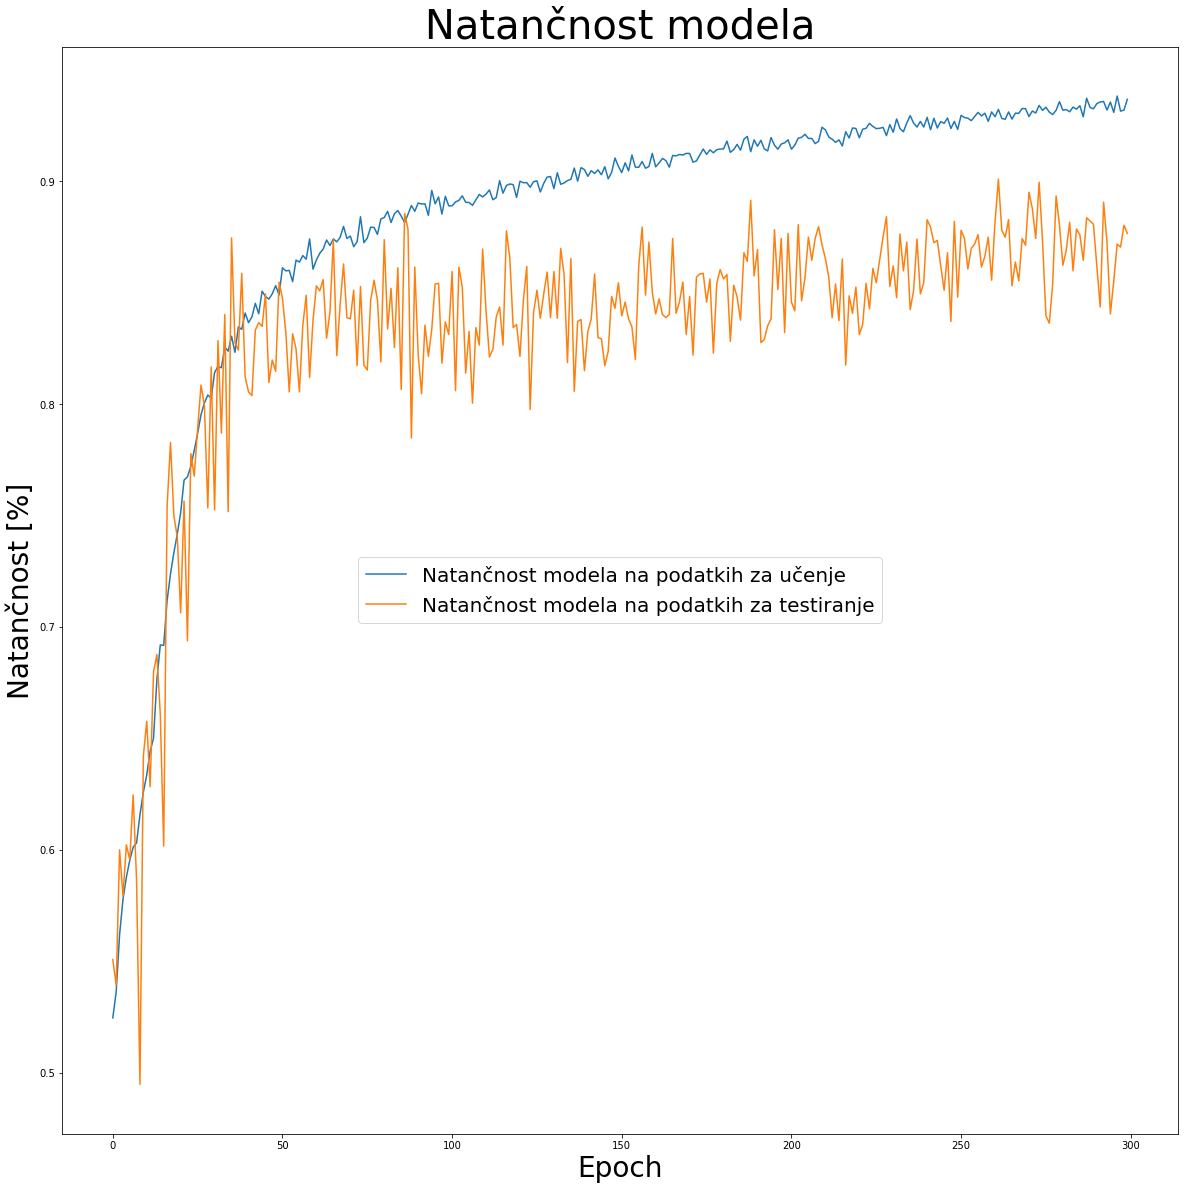

In [45]:
plt.figure(figsize=(20,20))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Natančnost modela').set_fontsize('40')
plt.ylabel('Natančnost [%]').set_fontsize('28')
plt.xlabel('Epoch').set_fontsize('28')
plt.xticks([0,50,100,150,200,250,300])
plt.legend(['Natančnost modela na podatkih za učenje', 'Natančnost modela na podatkih za testiranje'],
           prop={'size': 20}, loc='center')
plt.show()

# Največja natančnost:

### Epoch 262/300 - 1s - loss: 0.1513 - acc: 0.9322 - val_loss: 0.3673 - val_acc: 0.9009

In [46]:
scores = model.evaluate(x_train,y_train, verbose=1)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

17859/17859 [==============================] - 1s 35us/step
acc: 93.06%


In [22]:
from ann_visualizer.visualize import ann_viz
import os
from IPython.display import Image


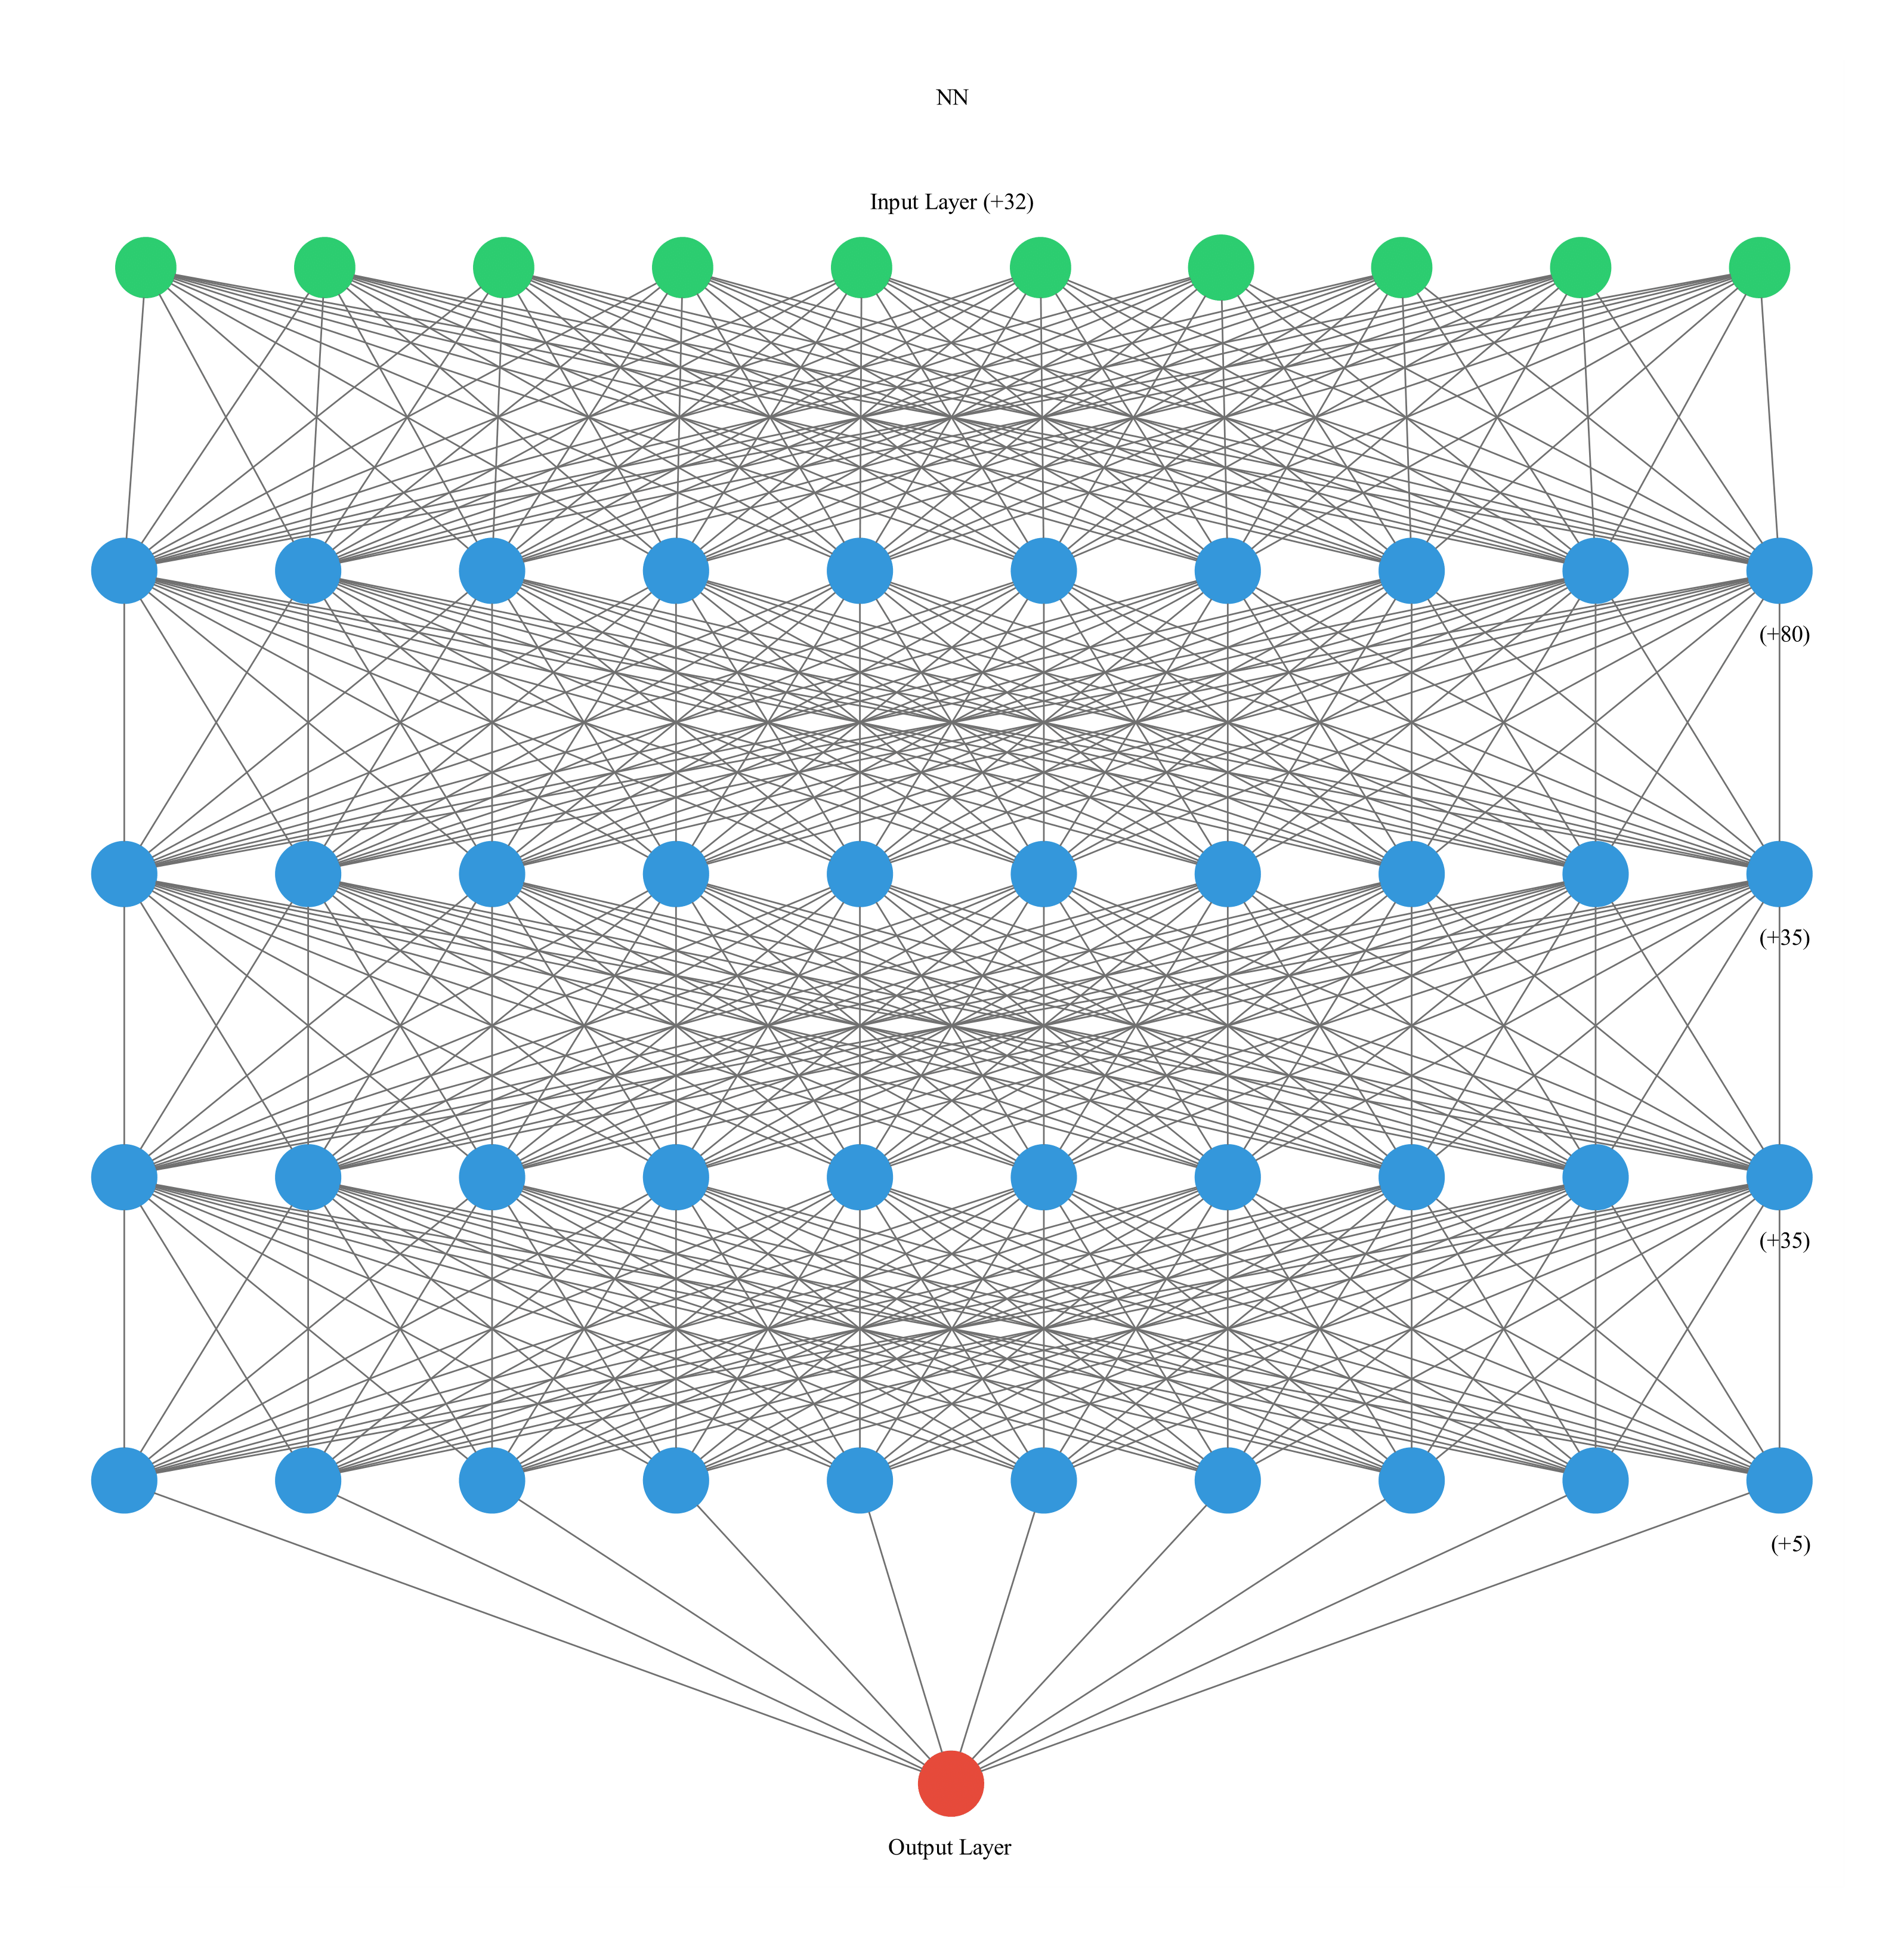

In [30]:
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

filename = 'Poizkus7-1'

#http://docs.wand-py.org


ann_viz(model, view = True, filename = filename, title ="NN")

Image('C:/Users/python_zan/'+filename+'.png')


Dodatki k kodi:

import glob
import pandas as pd

->Zdruzi vse data file

podatki = glob.glob("C:/Users/python_zan/Downloads/data01/*.csv")

df_list = []

for csv in sorted(podatki):
    df_list.append(pd.read_csv(csv))
cel_df = pd.concat(df_list)

cel_df.to_csv('C:/Users/python_zan/Downloads/data01/zdruzeno.csv')

-> Export v isti mapi kot so filei
->Potrebno je bilo v Excelu odstraniti še drugo vrstico saj sta 2 Header-ja

    
    

In [54]:
from keras.models import model_from_json

model_json = model.to_json()

with open("model.json", "w") as json_file:
    json_file.write(model_json)

    
model.save_weights("model.h5")

print('Shranjeno na disk')

Shranjeno na disk
